In [15]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r"C:\Users\sayal\Downloads\LP-IV-datasets\LP-IV-datasets\CIFR\train.csv")
test = pd.read_csv(r"C:\Users\sayal\Downloads\LP-IV-datasets\LP-IV-datasets\CIFR\test.csv")

In [4]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [7]:
x_train = train.drop(['label'], axis=1).values
x_train = x_train/255.0
y_train = train['label'].values

In [23]:
x_train.shape
x_train
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [20]:
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               393344    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer='SGD', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, batch_size=32, epochs=11, validation_split=0.2)

Epoch 1/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4970 - accuracy: 0.4665 - val_loss: 1.5137 - val_accuracy: 0.4660
Epoch 2/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4850 - accuracy: 0.4742 - val_loss: 1.5127 - val_accuracy: 0.4677
Epoch 3/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4672 - accuracy: 0.4787 - val_loss: 1.4947 - val_accuracy: 0.4727
Epoch 4/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4573 - accuracy: 0.4827 - val_loss: 1.4783 - val_accuracy: 0.4791
Epoch 5/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4451 - accuracy: 0.4895 - val_loss: 1.4764 - val_accuracy: 0.4785
Epoch 6/11
1250/1250 [==============================] - 3s 2ms/step - loss: 1.4324 - accuracy: 0.4909 - val_loss: 1.4704 - val_accuracy: 0.4804
Epoch 7/11
1250/1250 [==============================] - 2s 2ms/step - loss: 1.4242 - accuracy: 0.4945 - val_loss: 1.4667 - val_accuracy:

In [31]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


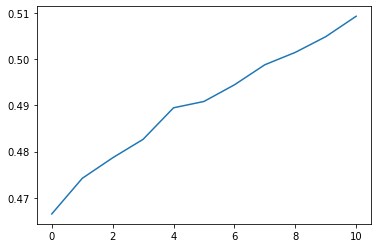

In [32]:
plt.plot(history.history['accuracy'])